<a href="https://colab.research.google.com/github/Mtxsantos/Vendas_Videogames_vgsales/blob/main/vgsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o Dataset**
Este dataset contém uma lista de jogos de videogames com vendas superiores a 100.000 cópias. Foi obtido através do https://www.kaggle.com/datasets/gregorut/videogamesales.

Os campos contém:

Ranking - Ranking de vendas gerais

Nome - O nome dos jogos

Plataforma - Plataforma do lançamento dos jogos (ou seja, PC, PS4, etc.)

Ano - Ano de lançamento do jogo

Gênero - Gênero do jogo

Editora - Editora do jogo

Vendas_NA - Vendas na América do Norte (em milhões)

Vendas_EU - Vendas na Europa (em milhões)

Vendas_JP - Vendas no Japão (em milhões)

Vendas_Outras - Vendas no resto do mundo (em milhões)

Vendas_Global - Total de vendas mundiais.

# Venda de jogos de videogames na História

In [1]:
#Importando as bibliotecas necessárias para análise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Importando o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgsales.csv")

In [ ]:
#Verificando as colunas presentes no dataframe
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#Verificando a quantidade de linhas e colunas do dataframe
df.shape

(16598, 11)

In [ ]:
#Exibir as 5 primeiras linhas do dataframe
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
#Renomeando as colunas
df.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano','Gênero', 'Editora', 'Vendas_NA', 
              'Vendas_EU','Vendas_JP', 'Vendas_Outras', 'Vendas_Global']

### Quantos jogos foram lançados para cada plataforma?

In [ ]:
#Utilizando value_counts para contar a quantidade de jogos lançados por cada plataforma
df['Plataforma'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

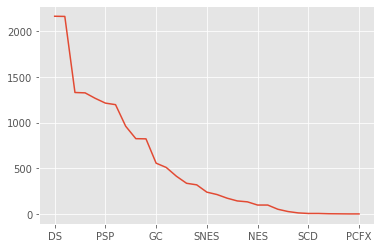

In [ ]:
#Atribuindo à uma variável e criando um gráfico
titulos_lançados = df['Plataforma'].value_counts()
titulos_lançados.plot()

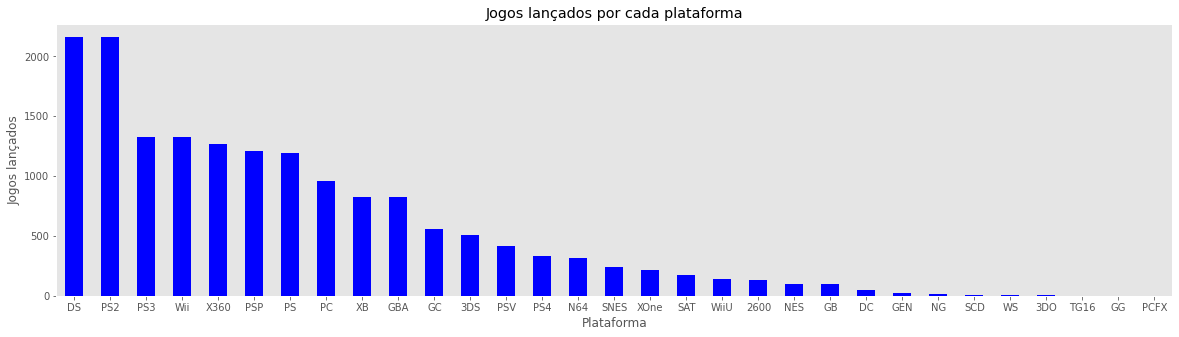

In [ ]:
#Transformando o gráfico para uma melhor compreensão
titulos_lançados.plot(kind = 'bar', figsize=(20,5), grid = False, rot = 0, color = 'blue')      

#Adicionando título e rótulos
plt.title('Jogos lançados por cada plataforma') #Adicionando o título
plt.xlabel('Plataforma') #Adicionando o rótulo no eixo x
plt.ylabel('Jogos lançados') #Adicionando o rótulo no eixo y
plt.show() #plotando o gráfico

### TOP10 Jogos mais vendidos do mundo

Text(0, 0.5, 'Jogos')

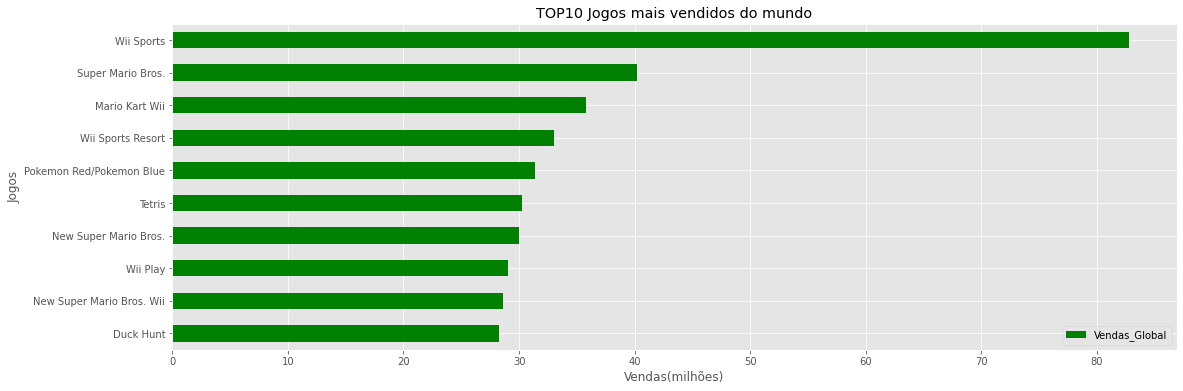

In [ ]:
#Atribuindo à uma variável e criando o gráfico
top_10_vendidos = df[['Nome','Vendas_Global']].head(10).set_index('Nome').sort_values('Vendas_Global', ascending = True) #set_index indica o que será mostrado no eixo X e sort_values no eixo Y
top_10_vendidos.plot(kind = 'barh', figsize = (18,6), grid = True, rot = 0, color = 'green')

#Adicionando título e rótulos
plt.title('TOP10 Jogos mais vendidos do mundo')
plt.xlabel('Vendas(milhões)')
plt.ylabel('Jogos')

### Quantidade de títulos por Gênero e Plataforma

In [7]:
#Fazendo cruzamento entre a coluna 'Plataforma' e 'Gênero' do dataset e armazeno na variável crosstab_df
crosstab_df = pd.crosstab(df['Plataforma'], df['Gênero'])

In [8]:
#Visualizando como ficou o cruzamento entre as colunas
crosstab_df.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [9]:
#Somando os valores em linha e adicionando a uma nova coluna 'Total' na tabela crosstab_df
crosstab_df['Total'] = crosstab_df.sum(axis = 1)

#Organizando os dados de forma decrescente
crosstab_df = crosstab_df.sort_values('Total', ascending=False)

#Criando uma nova tabela com valores da coluna 'Total' superiores a 1000
top10 = crosstab_df[crosstab_df['Total']>1000]

In [10]:
#Verificando a tabela
top10.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Plataforma,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265


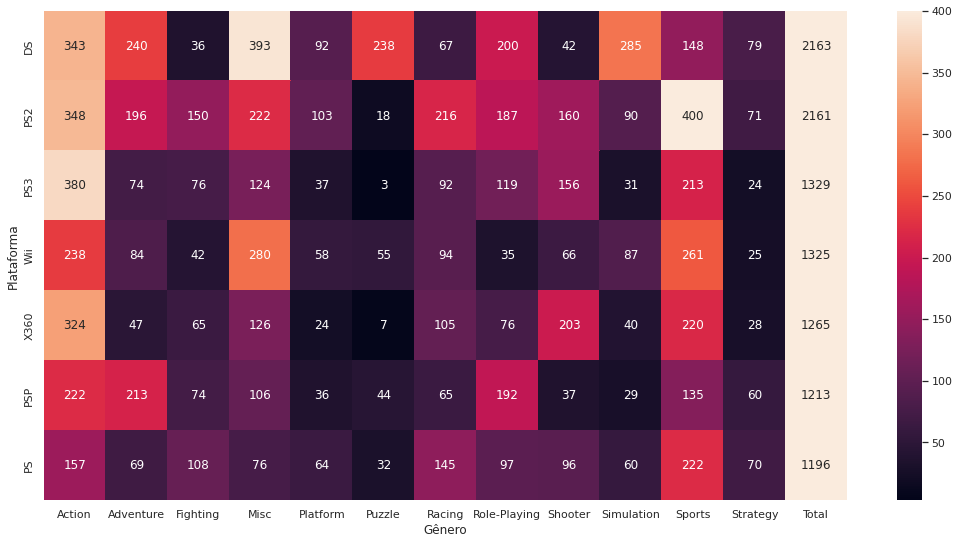

In [11]:
#Criando o mapa de calor(heatmap) com os dados da tabela top10
sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top10,annot=True, vmax=top10.loc[:'PS', :'Strategy'].values.max(), vmin=top10.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('Gênero')
plt.ylabel('Plataforma')
plt.show()

### Análise da plataforma Nintendo Wii

In [18]:
#Definindo o objeto de estudo e salvando na variável wii
wii = df[df['Plataforma'] == 'Wii']

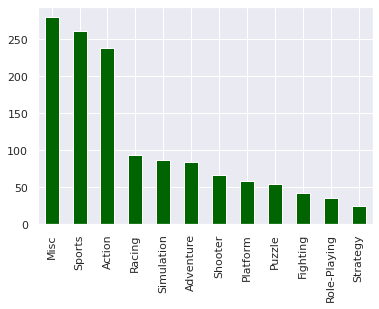

In [20]:
##Gerando um gráfico com a quantidade de jogos de cada gênero feito para o Nintendo Wii
wii['Gênero'].value_counts().plot.bar(color = 'darkgreen')

In [33]:
#Top7 dos jogos de ação vendidos no Japão (Wii)
wii.loc[(wii['Gênero'] == 'Misc') & (wii['Vendas_JP'] )].head(7)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Global
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
78,79,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49
80,81,Mario Party 8,Wii,2007.0,Misc,Nintendo,3.81,2.30,1.58,0.73,8.42
247,248,Michael Jackson: The Experience,Wii,2010.0,Misc,Ubisoft,2.67,1.35,0.01,0.39,4.42
286,287,Carnival Games,Wii,2007.0,Misc,Take-Two Interactive,2.13,1.50,0.05,0.42,4.10
320,321,Big Brain Academy: Wii Degree,Wii,2007.0,Misc,Nintendo,1.06,1.93,0.41,0.43,3.82


### Análise da plataforma PlayStation 3

In [23]:
#Definindo o objeto de estudo e salvando na variável ps3
ps3 = df[df['Plataforma'] == 'PS3']

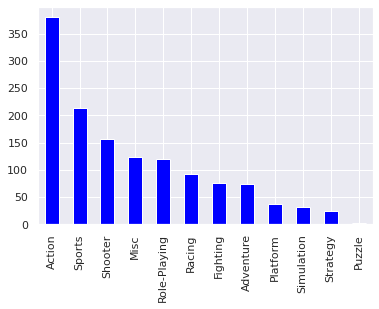

In [32]:
##Gerando um gráfico com a quantidade de jogos de cada gênero feito para o PlayStation 3
ps3['Gênero'].value_counts().plot.bar(color = 'blue')


In [34]:
#Top7 dos jogos de ação vendidos na América do Norte (PS3)
ps3.loc[(ps3['Gênero'] == 'Action') & (ps3['Vendas_NA'] )].head(7)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Global
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
115,116,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
119,120,Uncharted 2: Among Thieves,PS3,2009.0,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
123,124,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
128,129,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
